## Original data

import libraries

In [6]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [7]:
import keras

In [8]:
IMAGE_SIZE = [224, 224]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls '/content/drive'


MyDrive


dataset path

In [4]:
#Give dataset path
train_path = "/content/drive/MyDrive/vgg16/men_women/train"
test_path = "/content/drive/MyDrive/vgg16/men_women/test"

Working with 500 images
Image examples: 
00000800.jpg


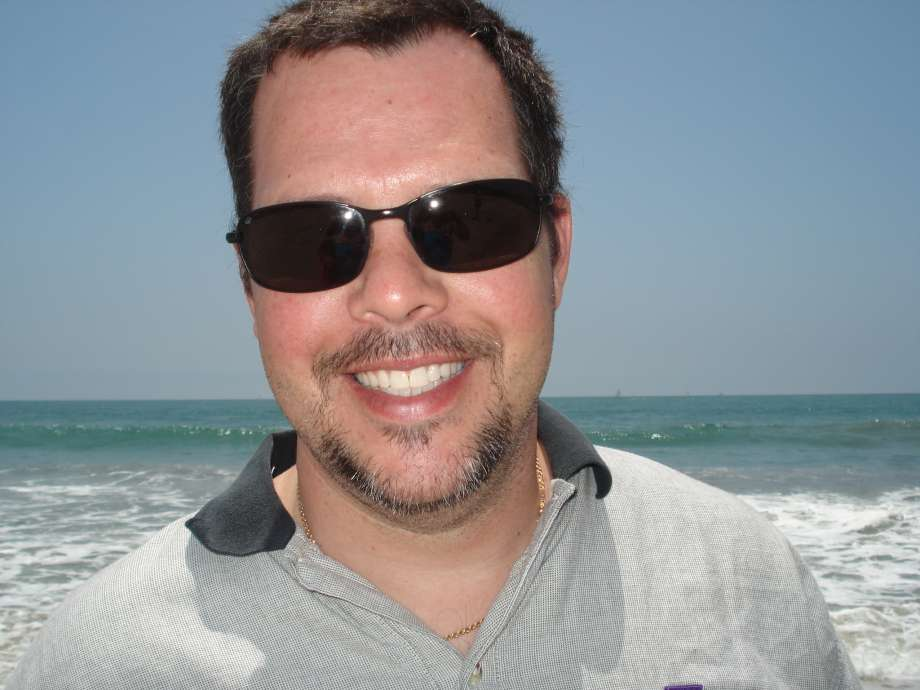

00000563.jpg


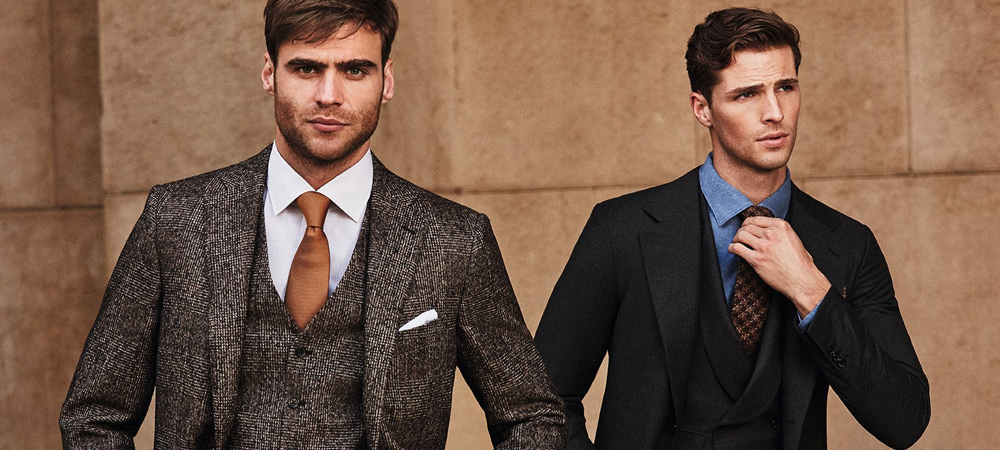

00000622.jpg


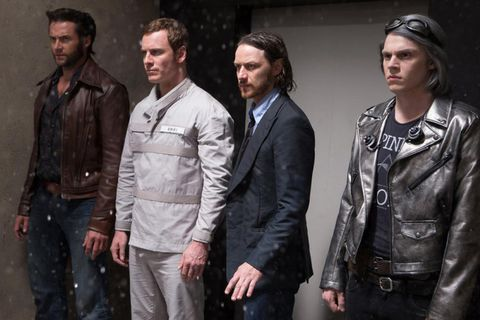

00000801.jpg


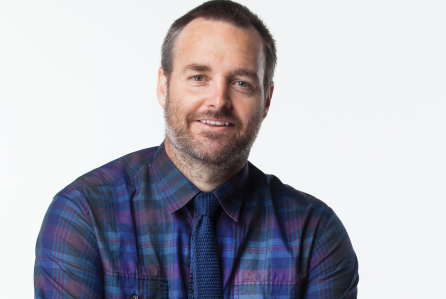

00000835.jpeg


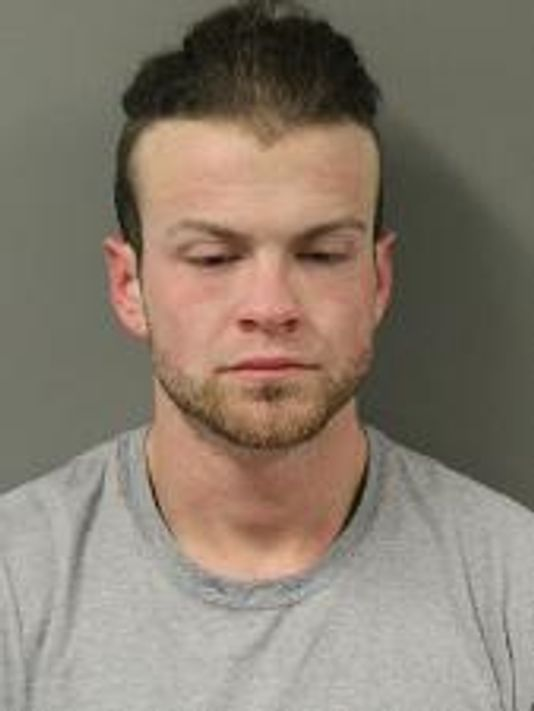

00000684.jpg


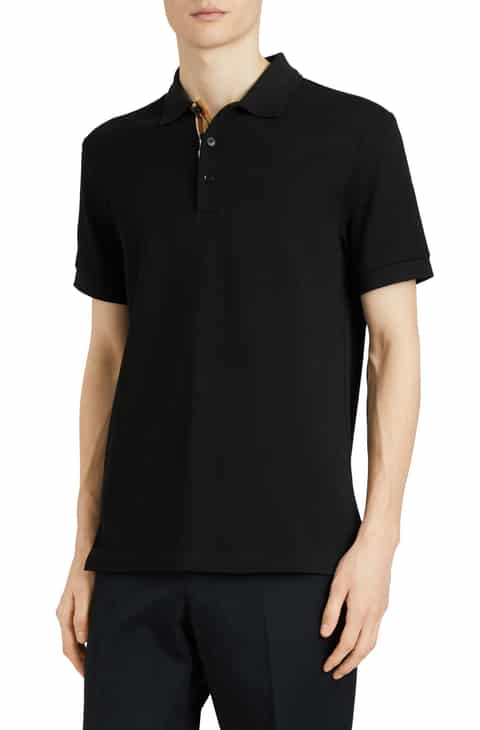

00000535.jpg


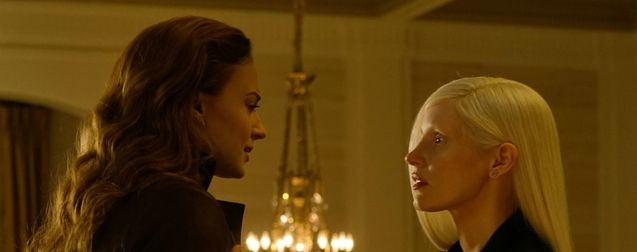

00000841.jpg


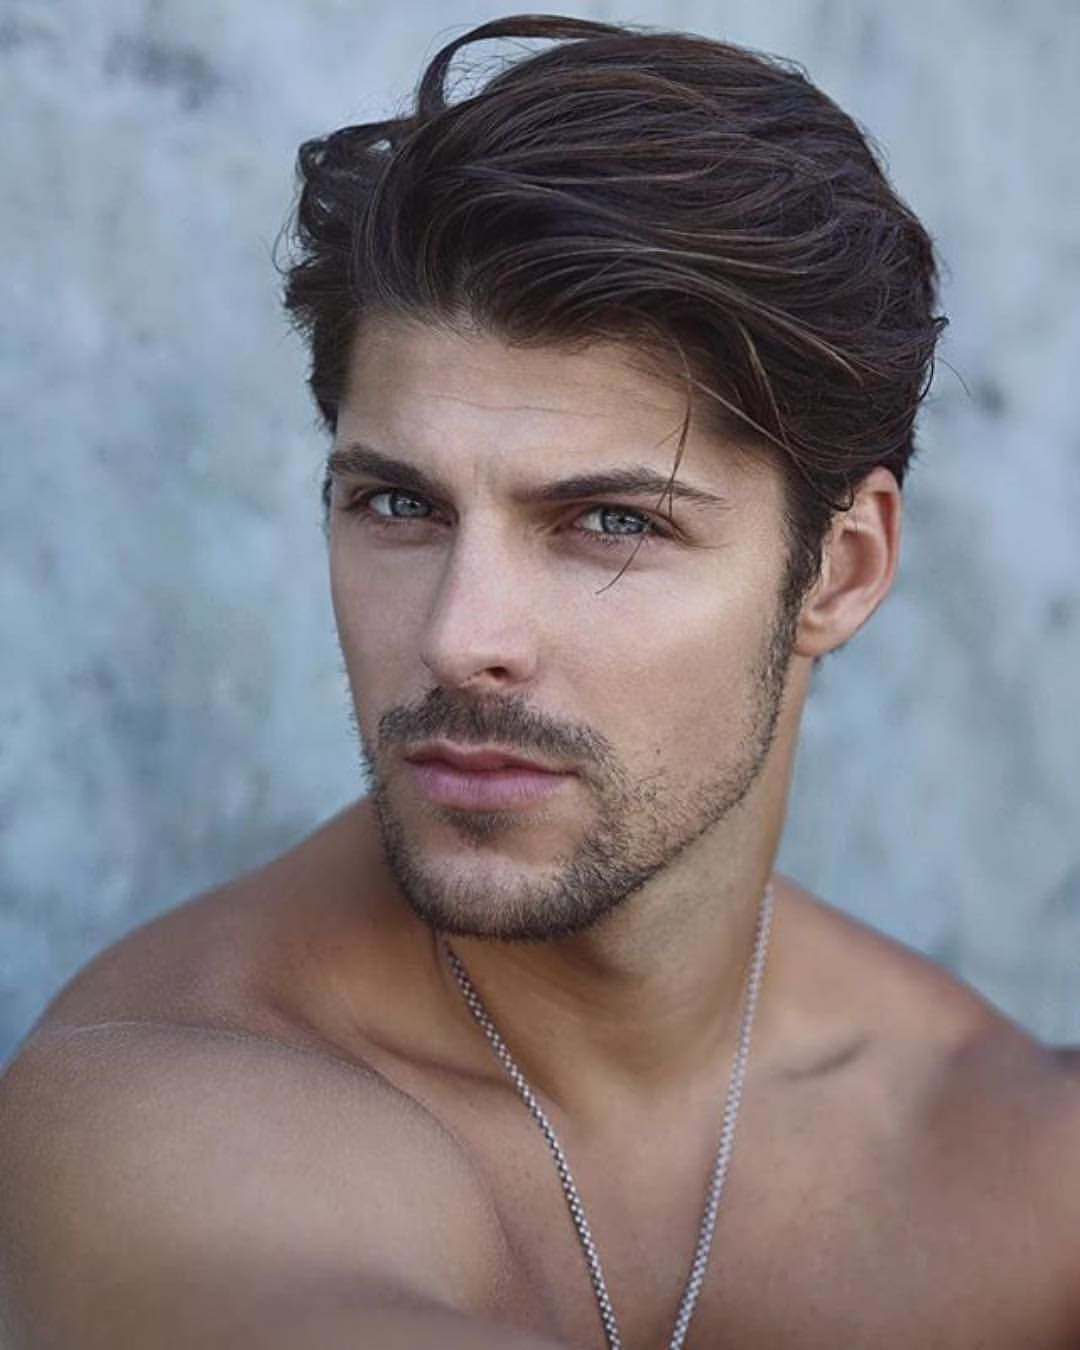

00000833.jpg


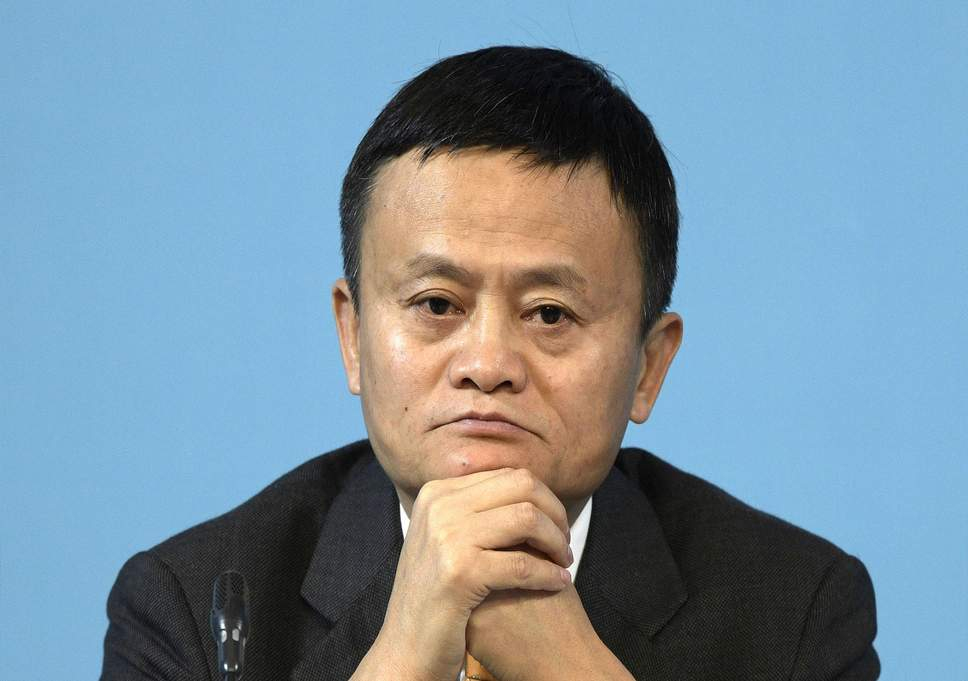

00000703.gif


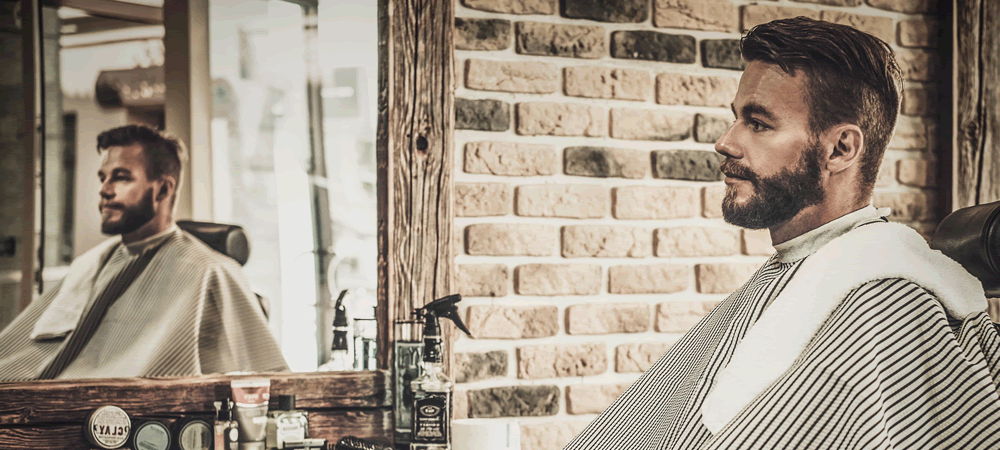

In [26]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/men500'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10,20):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [6]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


In [7]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [8]:
for layer in vgg.layers:
  layer.trainable = False

In [9]:
x = Flatten()(vgg.output)
num_classes = 2
prediction = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [11]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    )

In [12]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
   )

In [13]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 995 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 259 images belonging to 2 classes.


training the model

In [28]:

from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/vgg16_evaluation/mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=10,
  # steps_per_epoch=30,
  # validation_steps=32,
    callbacks=callbacks ,verbose=2)




Epoch 1/10

Epoch 1: val_loss improved from inf to 1.43363, saving model to /content/drive/MyDrive/vgg16_evaluation/mymodel.h5
32/32 - 30s - loss: 0.1683 - accuracy: 0.9980 - val_loss: 1.4336 - val_accuracy: 0.9151 - 30s/epoch - 949ms/step
Epoch 2/10

Epoch 2: val_loss improved from 1.43363 to 1.24293, saving model to /content/drive/MyDrive/vgg16_evaluation/mymodel.h5
32/32 - 27s - loss: 0.0784 - accuracy: 0.9990 - val_loss: 1.2429 - val_accuracy: 0.9305 - 27s/epoch - 852ms/step
Epoch 3/10

Epoch 3: val_loss improved from 1.24293 to 1.21557, saving model to /content/drive/MyDrive/vgg16_evaluation/mymodel.h5
32/32 - 36s - loss: 0.1590 - accuracy: 0.9980 - val_loss: 1.2156 - val_accuracy: 0.9305 - 36s/epoch - 1s/step
Epoch 4/10

Epoch 4: val_loss did not improve from 1.21557
32/32 - 27s - loss: 0.1189 - accuracy: 0.9990 - val_loss: 1.4634 - val_accuracy: 0.9151 - 27s/epoch - 846ms/step
Epoch 5/10

Epoch 5: val_loss improved from 1.21557 to 1.08849, saving model to /content/drive/MyDrive/

In [29]:
model_history.history

{'loss': [0.1682899296283722,
  0.07838954031467438,
  0.15904904901981354,
  0.11891869455575943,
  0.11940443515777588,
  0.15138235688209534,
  0.08607212454080582,
  0.19511447846889496,
  0.1615639328956604,
  0.10182344913482666],
 'accuracy': [0.9979899525642395,
  0.9989949464797974,
  0.9979899525642395,
  0.9989949464797974,
  0.9989949464797974,
  0.9989949464797974,
  0.9969848990440369,
  0.9979899525642395,
  0.9989949464797974,
  0.9989949464797974],
 'val_loss': [1.4336315393447876,
  1.2429298162460327,
  1.215573787689209,
  1.4633790254592896,
  1.088494062423706,
  1.1730585098266602,
  1.4554328918457031,
  1.7915524244308472,
  1.0059056282043457,
  1.1079607009887695],
 'val_accuracy': [0.915057897567749,
  0.9305019378662109,
  0.9305019378662109,
  0.915057897567749,
  0.9420849680900574,
  0.9498069286346436,
  0.92277991771698,
  0.9111968874931335,
  0.9498069286346436,
  0.9459459185600281]}

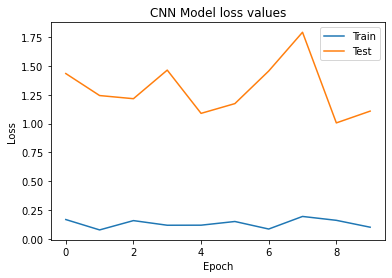

In [30]:
_# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('CNN Model loss values')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

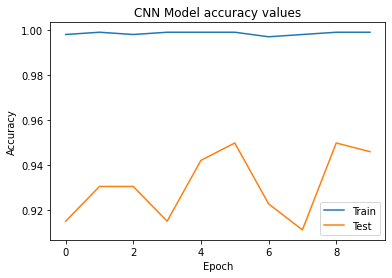

In [31]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()


Testing the model

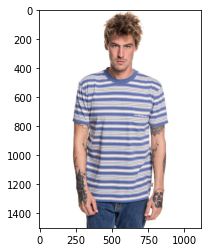

In [39]:
img = plt.imread("/content/drive/MyDrive/vgg16/men_women/test/men130/00000001.jpg")
plt.imshow(img)

In [38]:
import tensorflow as tf
from keras.preprocessing import image

1/1 [==============================] - 1s 814ms/step
men


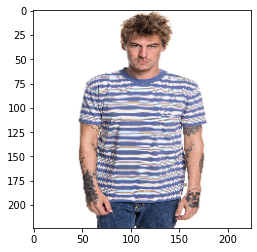

In [47]:

img = tf.keras.utils.load_img("/content/drive/MyDrive/vgg16/men_women/test/men130/00000001.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model('/content/drive/MyDrive/vgg16_evaluation/mymodel.h5')

output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("men")
else:
    print('women')

In [39]:
def predict_img(img):
  img = tf.keras.utils.load_img(img,target_size=(224,224))
  img = np.asarray(img)
  plt.imshow(img)
  img = np.expand_dims(img, axis=0)
  from keras.models import load_model
  saved_model = load_model('/content/drive/MyDrive/vgg16_evaluation/mymodel.h5')

  output = saved_model.predict(img)
  if output[0][0] > output[0][1]:
      print("men")
  else:
      print('women')

1/1 [==============================] - 0s 116ms/step
women


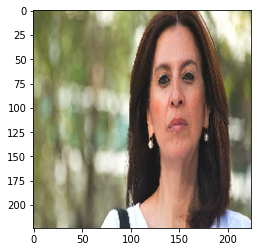

In [42]:
predict_img("/content/drive/MyDrive/vgg16/men_women/test1/test1/women/00001315.jpg")

1/1 [==============================] - 0s 113ms/step
men


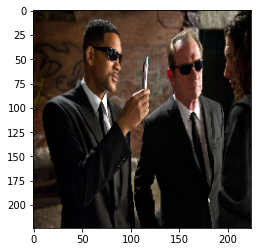

In [43]:
predict_img("/content/drive/MyDrive/vgg16/men_women/test1/test1/men/00000408.jpg")

## For Augmented Dataset
The data augmentation is done with different code and the augmented images are saved differently(apart from original dataset). So in the following code we are considering only augmented images not original images.
(Augmented code is shared with this file)

import librarires

In [15]:
import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [16]:
IMAGE_SIZE = [224, 224]

dataset path(for augmented images)

In [17]:
train_path = "/content/drive/MyDrive/vgg16/men_women/Augmented_dataset/train"
test_path = "/content/drive/MyDrive/vgg16/men_women/Augmented_dataset/test"

Augmented image examples

Working with 499 images
Image examples: 
men500_original_00001076.jpg_fc490742-af13-44b8-a309-a688934e7d0b.jpg


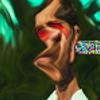

men500_original_00000859.jpg_052010b2-8b24-4fc9-a81e-68616b6cb9ed.jpg


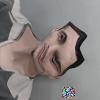

men500_original_00001130.jpg_b77e9a60-bf41-4ebb-a694-9b61752577e2.jpg


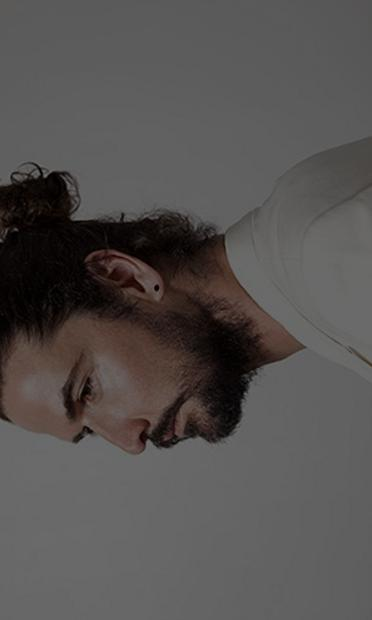

men500_original_00001225.jpg_ab0fc88b-cfc9-442e-8da4-44798f1af5de.jpg


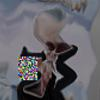

men500_original_00000882.jpg_94317281-57c1-477e-a686-7566d6c52ba9.jpg


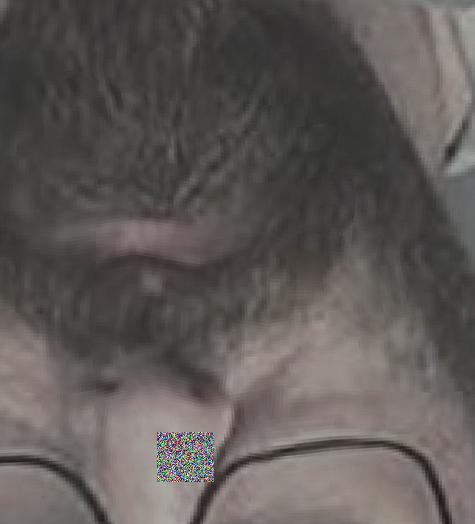

men500_original_00000667.jpg_d22dc7e1-db36-44fa-856e-7d924427fa38.jpg


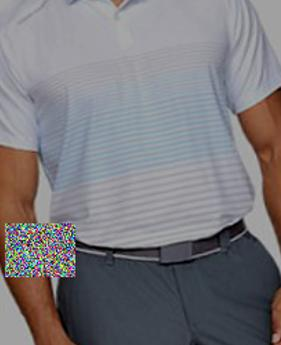

men500_original_00000994.png_6c437614-f6ec-4828-b081-d77f5f6c7d4b.png


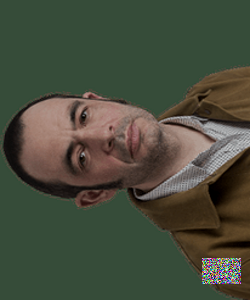

men500_original_00001004.jpg_36bbc023-bdbc-4c58-9162-e03d91ae53b5.jpg


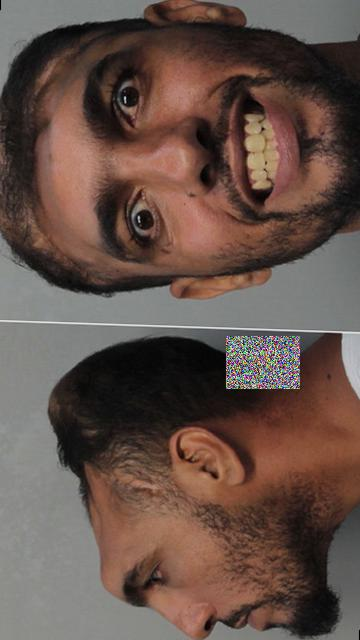

men500_original_00000818.jpg_04108b09-9237-40e1-84f8-3d8cfcce432c.jpg


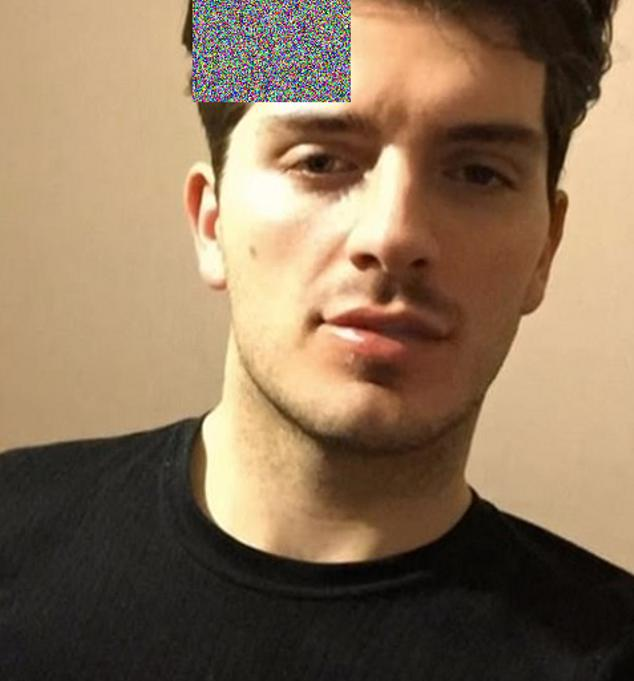

men500_original_00001258.jpg_a70ec434-b504-4dd2-b5f7-86e56cddc520.jpg


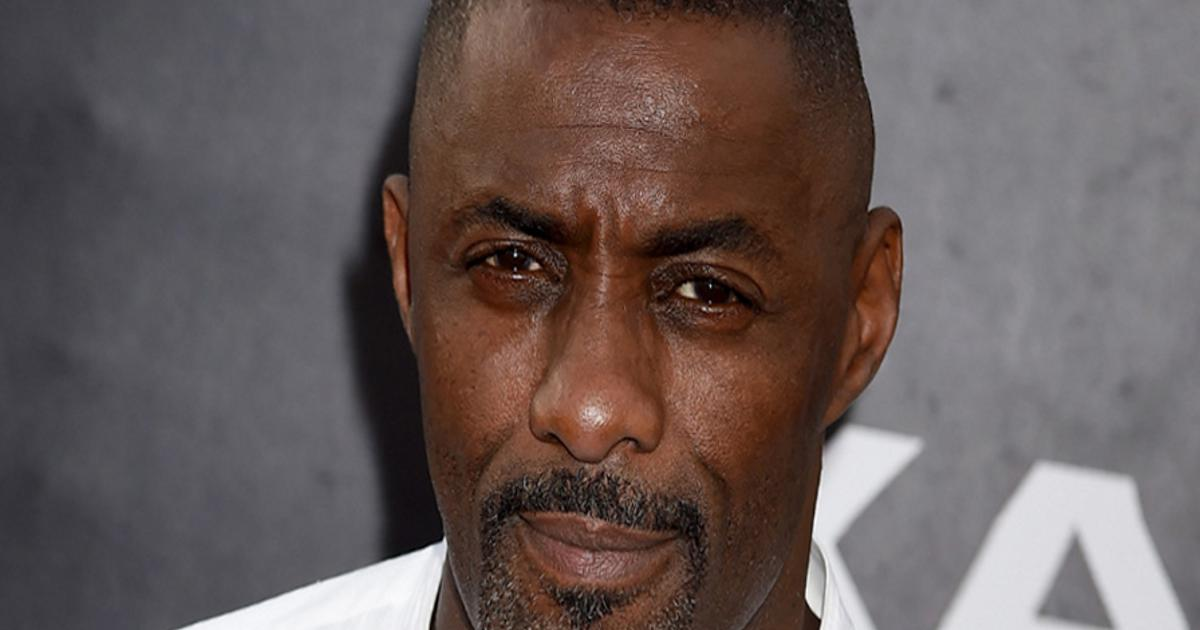

In [18]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/men'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10,20):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [19]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


In [20]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [21]:
for layer in vgg.layers:
  layer.trainable = False

In [22]:
x = Flatten()(vgg.output)
num_classes = 2
prediction = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [23]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [24]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    )

In [25]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
   )

In [26]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 949 images belonging to 2 classes.


In [27]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 260 images belonging to 2 classes.


In [30]:

from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/vgg16_evaluation/vgg16_Augmented.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=10,
  # steps_per_epoch=30,
  # validation_steps=32,
    callbacks=callbacks ,verbose=2)




Epoch 1/10

Epoch 1: val_loss improved from inf to 3.15409, saving model to /content/drive/MyDrive/vgg16_evaluation/vgg16_Augmented.h5
30/30 - 18s - loss: 0.5643 - accuracy: 0.9579 - val_loss: 3.1541 - val_accuracy: 0.7692 - 18s/epoch - 590ms/step
Epoch 2/10

Epoch 2: val_loss improved from 3.15409 to 3.10146, saving model to /content/drive/MyDrive/vgg16_evaluation/vgg16_Augmented.h5
30/30 - 18s - loss: 0.1411 - accuracy: 0.9874 - val_loss: 3.1015 - val_accuracy: 0.7692 - 18s/epoch - 603ms/step
Epoch 3/10

Epoch 3: val_loss did not improve from 3.10146
30/30 - 20s - loss: 0.0230 - accuracy: 0.9989 - val_loss: 3.3371 - val_accuracy: 0.7654 - 20s/epoch - 679ms/step
Epoch 4/10

Epoch 4: val_loss did not improve from 3.10146
30/30 - 16s - loss: 0.0154 - accuracy: 1.0000 - val_loss: 3.2833 - val_accuracy: 0.7769 - 16s/epoch - 545ms/step
Epoch 5/10

Epoch 5: val_loss did not improve from 3.10146
30/30 - 16s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.2312 - val_accuracy: 0.7692 - 16s/epo

In [31]:
model_history.history

{'loss': [0.564281165599823,
  0.14114993810653687,
  0.022950368002057076,
  0.015424290671944618,
  0.001445319503545761,
  0.001145491492934525,
  6.073633267078549e-05,
  4.845533112529665e-05,
  4.105871994397603e-05,
  3.6654080759035423e-05],
 'accuracy': [0.9578503966331482,
  0.98735511302948,
  0.9989462494850159,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [3.154093027114868,
  3.1014645099639893,
  3.3371238708496094,
  3.2832515239715576,
  3.231226682662964,
  3.211181402206421,
  3.203233480453491,
  3.2019853591918945,
  3.2012991905212402,
  3.200820207595825],
 'val_accuracy': [0.7692307829856873,
  0.7692307829856873,
  0.7653846144676208,
  0.7769230604171753,
  0.7692307829856873,
  0.7769230604171753,
  0.7730769515037537,
  0.7730769515037537,
  0.7730769515037537,
  0.7730769515037537]}

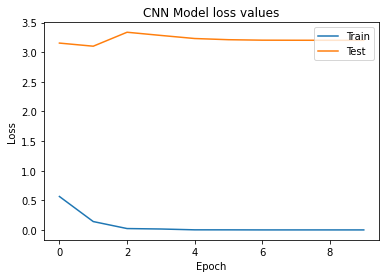

In [32]:
_# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('CNN Model loss values')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

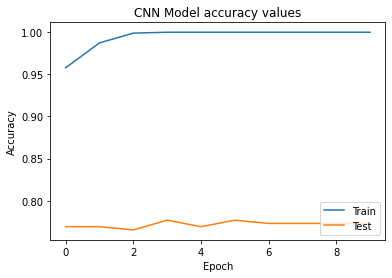

In [33]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()


In [34]:
import tensorflow as tf
from keras.preprocessing import image

In [35]:
def predict_img(img):
  img = tf.keras.utils.load_img(img,target_size=(224,224))
  img = np.asarray(img)
  plt.imshow(img)
  img = np.expand_dims(img, axis=0)
  from keras.models import load_model
  saved_model = load_model('/content/drive/MyDrive/vgg16_evaluation/vgg16_Augmented.h5')

  output = saved_model.predict(img)
  if output[0][0] > output[0][1]:
      print("men")
  else:
      print('women')

1/1 [==============================] - 0s 120ms/step
men


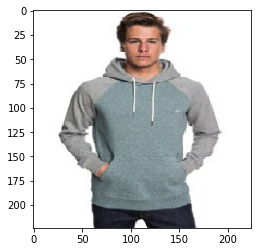

In [36]:
predict_img("/content/drive/MyDrive/vgg16/men_women/test1/test1/men/00000399.jpg")

1/1 [==============================] - 0s 123ms/step
women


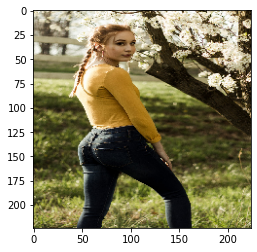

In [37]:
predict_img("/content/drive/MyDrive/vgg16/men_women/test1/test1/women/00001318.jpg")